In [72]:
import csv
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

In [73]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

In [74]:
NUM_CLASSES = 4

In [75]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [76]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [77]:
RANDOM_SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [78]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [79]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_8 (Dropout)         (None, 42)                0         
                                                                 
 dense_12 (Dense)            (None, 20)                860       
                                                                 
 dropout_9 (Dropout)         (None, 20)                0         
                                                                 
 dense_13 (Dense)            (None, 10)                210       
                                                                 
 dense_14 (Dense)            (None, 4)                 44        
                                                                 
Total params: 1114 (4.35 KB)
Trainable params: 1114 (4.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [80]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [81]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [82]:
model.fit(
    X_train,
    y_train,
    epochs=3000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/3000


 1/12 [=>............................] - ETA: 3s - loss: 1.4019 - accuracy: 0.2344
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
12/12 [==============================] - 0s 12ms/step - loss: 1.4124 - accuracy: 0.2908 - val_loss: 1.3537 - val_accuracy: 0.3738
Epoch 2/3000
 1/12 [=>............................] - ETA: 0s - loss: 1.3582 - accuracy: 0.3125
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
12/12 [==============================] - 0s 5ms/step - loss: 1.3336 - accuracy: 0.3347 - val_loss: 1.2797 - val_accuracy: 0.4254
Epoch 3/3000
 1/12 [=>............................] - ETA: 0s - loss: 1.3175 - accuracy: 0.4297
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
12/12 [==============================] - 0s 4ms/step - loss: 1.2849 - accuracy: 0.3865 - val_loss: 1.2118 - val_accuracy: 0.5427
Epoch 4/3000
 1/12 [=>............................] - ETA: 0s - loss: 1.2296 - accuracy: 0.4297
Epoch 4: savi

/home/musashi/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 5: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
12/12 [==============================] - 0s 4ms/step - loss: 1.1584 - accuracy: 0.4887 - val_loss: 1.0563 - val_accuracy: 0.6899
Epoch 6/3000
 1/12 [=>............................] - ETA: 0s - loss: 1.1588 - accuracy: 0.4297
Epoch 6: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
12/12 [==============================] - 0s 4ms/step - loss: 1.0999 - accuracy: 0.5359 - val_loss: 0.9638 - val_accuracy: 0.6998
Epoch 7/3000
 1/12 [=>............................] - ETA: 0s - loss: 1.0950 - accuracy: 0.5156
Epoch 7: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
12/12 [==============================] - 0s 4ms/step - loss: 1.0329 - accuracy: 0.5777 - val_loss: 0.8642 - val_accuracy: 0.7435
Epoch 8/3000
 1/12 [=>............................] - ETA: 0s - loss: 1.0312 - accuracy: 0.5859
Epoch 8: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
12/12 [=============

In [83]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

4/4 [==============================] - 0s 2ms/step - loss: 0.1054 - accuracy: 0.9901


In [84]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [85]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 33ms/step
[3.6496647e-02 6.2003210e-07 9.6294922e-01 5.5351615e-04]
2


16/16 [==============================] - 0s 833us/step


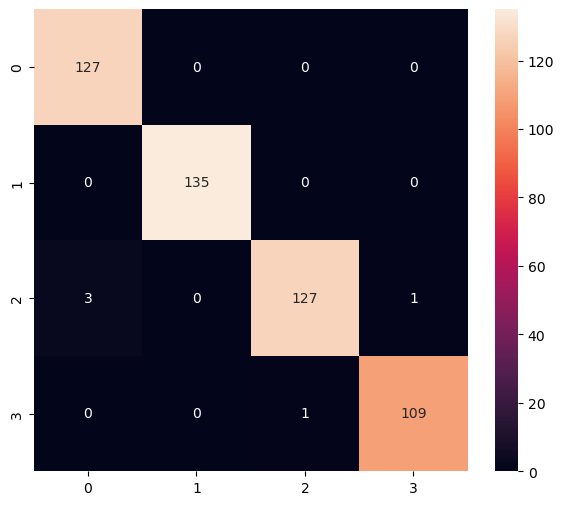

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       127
           1       1.00      1.00      1.00       135
           2       0.99      0.97      0.98       131
           3       0.99      0.99      0.99       110

    accuracy                           0.99       503
   macro avg       0.99      0.99      0.99       503
weighted avg       0.99      0.99      0.99       503



In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [87]:

# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

/home/musashi/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [88]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmpw4u4ztlr/assets


INFO:tensorflow:Assets written to: /tmp/tmpw4u4ztlr/assets
2023-09-05 22:35:32.169096: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-09-05 22:35:32.169120: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-09-05 22:35:32.169258: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpw4u4ztlr
2023-09-05 22:35:32.169955: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2023-09-05 22:35:32.169968: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /tmp/tmpw4u4ztlr
2023-09-05 22:35:32.172810: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2023-09-05 22:35:32.198293: I tensorflow/cc/saved_model/loader.cc:215] Running initialization op on SavedModel bundle at path: /tmp/tmpw4u4ztlr
2023-09-05 22:35:32.206511: I tensorflow/cc/saved_model/loader.cc:314] SavedModel

6608